In [213]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
##ONLY IF you have not installed plotnine before##
#!pip install plotnine (in anaconda prompt)
from plotnine import *
from typing import Dict, List, Tuple
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [214]:
eum = pd.read_csv('/Users/nihao/Downloads/NL_FR_BE_data_monthly.csv')
euy=pd.read_csv('/Users/nihao/Downloads/NL_FR_BE_data_annual.csv')
euf=pd.read_csv('/Users/nihao/Downloads/NL_FR_BE_firms.csv')
ff = pd.read_csv('/Users/nihao/Downloads/Europe_FF_Factors.csv')


# look at the data
display(eum)
display(euy)
display(euf)
display(ff)

,ISIN,mdate,RET,RET11,ME,b,h,s,ivol
0,FR0000078875,200110,-0.0376,0.1122,18.3645,0.7979,0.4265,1.0945,0.0402
1,FR0000078875,200111,-0.0444,-0.0147,17.5492,0.8795,0.6104,1.1042,0.0533
2,FR0000078875,200112,-0.0137,-0.2766,17.3088,0.8696,0.6413,1.0696,0.0129
3,FR0000078875,200201,0.0942,-0.1528,18.9398,0.7082,0.1435,1.2752,0.0651
4,FR0000078875,200202,0.0276,-0.0070,19.4618,0.7873,0.2618,1.3471,0.0369
...,...,...,...,...,...,...,...,...,...
235689,FR0000039539,200410,-0.0711,0.4320,99.6765,1.0470,-0.9141,1.3148,0.0245
235690,FR0000039539,200411,0.1840,0.4724,118.0193,1.1358,-0.2908,1.6981,0.0490
235691,FR0000039539,200412,0.0089,0.2307,119.0678,1.1330,-0.3969,1.8439,0.0097
235692,FR0000039539,200501,-0.0214,0.0930,116.5239,1.0216,-1.4111,1.1242,0.0064


,ISIN,fyear,BEME,OP,INV
0,ANN4327C1220,1990,0.6576,0.5865,0.0100
1,ANN4327C1220,1991,0.5890,0.5048,0.1150
2,ANN4327C1220,1992,0.7228,0.5371,-0.0055
3,ANN4327C1220,1993,0.3773,0.5429,0.0101
4,ANN4327C1220,1994,0.4160,0.6629,0.1190
...,...,...,...,...,...
23121,ZM0000000037,2014,15.8654,0.0616,0.2071
23122,ZM0000000037,2015,41.9586,-0.2238,-0.0991
23123,ZM0000000037,2016,14.6752,-0.0142,0.1579
23124,ZM0000000037,2017,12.9227,-0.0241,0.0070


,ISIN,name,country,dscode
0,ANN4327C1220,HUNTER DOUGLAS,NL,933240
1,BE0003005957,BELGOLAISE,BE,932374
2,BE0003008019,NALE.BK.VAN BELGIE NV,BE,929327
3,BE0003010031,CREDIT GENERAL,BE,932376
4,BE0003016095,BELGO-KATANGA,BE,932378
...,...,...,...,...
1900,NL0013654783,PROSUS NV,NL,95087K
1901,NL0014332678,JDE PEETS NV,NL,9746L8
1902,NL0015000GX8,ENVIPCO HOLDING NV,NL,685172
1903,NL0015000K93,EUROCOMMERCIAL DUTCH NV,NL,307406


,mdate,MktRF,SMB,HML,RF,WML
0,199106,-0.0741,0.0061,-0.0069,0.0042,0.0054
1,199107,0.0530,-0.0323,-0.0035,0.0049,0.0506
2,199108,0.0142,-0.0093,-0.0008,0.0046,0.0377
3,199109,0.0302,0.0173,-0.0005,0.0046,0.0423
4,199110,-0.0262,-0.0078,-0.0130,0.0042,0.0307
...,...,...,...,...,...,...
368,202202,-0.0377,0.0039,0.0057,0.0000,-0.0002
369,202203,-0.0033,0.0059,0.0040,0.0000,0.0417
370,202204,-0.0586,-0.0134,0.0264,0.0000,0.0204
371,202205,0.0127,-0.0157,0.0523,0.0003,-0.0164


In [215]:
# Data Preprocessing
eum['mdate'] = pd.to_datetime(eum['mdate'], format='%Y%m')
euy['fyear'] = pd.to_numeric(euy['fyear'])  
ff['mdate'] = pd.to_datetime(ff['mdate'], format='%Y%m')

# Extract year from monthly data for merging
eum['fyear'] = eum['mdate'].dt.year

# Lag BEME, OP, INV by one year
euy[['BEME_lag', 'OP_lag', 'INV_lag']] = euy[['BEME', 'OP', 'INV']].shift(1)
euy['BEME'] = euy['BEME_lag']
euy['OP'] = euy['OP_lag']
euy['INV'] = euy['INV_lag']
euy = euy.drop(columns=['BEME_lag', 'OP_lag', 'INV_lag'])

# Merge datasets
data = eum.merge(euy, on=['ISIN', 'fyear'], how='left')
data = data.merge(euf[['ISIN', 'country']], on='ISIN', how='left') 
data = data.merge(ff, on='mdate', how='left')

# Display the merged data
display(data)

,ISIN,mdate,RET,RET11,ME,b,h,s,ivol,fyear,BEME,OP,INV,country,MktRF,SMB,HML,RF,WML
0,FR0000078875,2001-10-01,-0.0376,0.1122,18.3645,0.7979,0.4265,1.0945,0.0402,2001,0.0370,0.4341,0.4212,FR,0.0324,0.0179,-0.0329,0.0022,-0.0666
1,FR0000078875,2001-11-01,-0.0444,-0.0147,17.5492,0.8795,0.6104,1.1042,0.0533,2001,0.0370,0.4341,0.4212,FR,0.0409,0.0180,-0.0110,0.0017,-0.0967
2,FR0000078875,2001-12-01,-0.0137,-0.2766,17.3088,0.8696,0.6413,1.0696,0.0129,2001,0.0370,0.4341,0.4212,FR,0.0182,-0.0183,0.0140,0.0015,0.0273
3,FR0000078875,2002-01-01,0.0942,-0.1528,18.9398,0.7082,0.1435,1.2752,0.0651,2002,0.4078,0.4951,0.4382,FR,-0.0470,0.0294,0.0183,0.0014,0.0597
4,FR0000078875,2002-02-01,0.0276,-0.0070,19.4618,0.7873,0.2618,1.3471,0.0369,2002,0.4078,0.4951,0.4382,FR,0.0041,-0.0035,0.0174,0.0013,0.0594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235689,FR0000039539,2004-10-01,-0.0711,0.4320,99.6765,1.0470,-0.9141,1.3148,0.0245,2004,NaN,NaN,NaN,FR,0.0406,0.0004,0.0069,0.0011,0.0000
235690,FR0000039539,2004-11-01,0.1840,0.4724,118.0193,1.1358,-0.2908,1.6981,0.0490,2004,NaN,NaN,NaN,FR,0.0686,0.0209,0.0173,0.0015,0.0089
235691,FR0000039539,2004-12-01,0.0089,0.2307,119.0678,1.1330,-0.3969,1.8439,0.0097,2004,NaN,NaN,NaN,FR,0.0425,0.0037,0.0072,0.0016,0.0087
235692,FR0000039539,2005-01-01,-0.0214,0.0930,116.5239,1.0216,-1.4111,1.1242,0.0064,2005,NaN,NaN,NaN,FR,-0.0125,0.0356,0.0157,0.0016,0.0087


In [216]:
# Display data for ISIN 'ANN4327C1220'
isin_data = data[data['ISIN'] == 'ANN4327C1220']
display(isin_data)

,ISIN,mdate,RET,RET11,ME,b,h,s,ivol,fyear,BEME,OP,INV,country,MktRF,SMB,HML,RF,WML
209590,ANN4327C1220,1991-06-01,-0.0256,-0.2089,712.4517,1.2541,-0.9141,-0.1884,0.0074,1991,0.6576,0.5865,0.0100,NL,-0.0741,0.0061,-0.0069,0.0042,0.0054
209591,ANN4327C1220,1991-07-01,0.0240,0.1856,729.5600,1.1767,-1.2208,-0.2632,0.0075,1991,0.6576,0.5865,0.0100,NL,0.0530,-0.0323,-0.0035,0.0049,0.0506
209592,ANN4327C1220,1991-08-01,-0.0799,0.2478,671.2840,0.9473,-1.7583,-0.5612,0.0189,1991,0.6576,0.5865,0.0100,NL,0.0142,-0.0093,-0.0008,0.0046,0.0377
209593,ANN4327C1220,1991-09-01,0.0104,0.1067,678.2727,0.9332,-1.2957,-0.4399,0.0037,1991,0.6576,0.5865,0.0100,NL,0.0302,0.0173,-0.0005,0.0046,0.0423
209594,ANN4327C1220,1991-10-01,-0.0641,0.1046,634.7768,0.9440,-1.1013,-0.4311,0.0108,1991,0.6576,0.5865,0.0100,NL,-0.0262,-0.0078,-0.0130,0.0042,0.0307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209934,ANN4327C1220,2020-02-01,-0.0962,-0.0915,2055.9164,0.8696,-0.3524,0.5193,0.0121,2020,0.7440,0.3830,0.0735,NL,-0.0898,0.0028,-0.0074,0.0012,0.0076
209935,ANN4327C1220,2020-03-01,-0.2387,-0.3423,1565.1098,1.0308,-0.2267,0.9105,0.0270,2020,0.7440,0.3830,0.0735,NL,-0.1544,-0.0422,-0.1130,0.0012,0.0757
209936,ANN4327C1220,2020-04-01,0.0372,-0.2961,1623.2926,0.9352,-0.0580,0.6602,0.0263,2020,0.7440,0.3830,0.0735,NL,0.0670,0.0503,-0.0382,0.0000,0.0102
209937,ANN4327C1220,2020-05-01,0.0322,-0.3112,1675.6150,0.8605,0.0336,0.5767,0.0192,2020,0.7440,0.3830,0.0735,NL,0.0543,0.0121,-0.0414,0.0001,0.0290


In [217]:
# Factor Calculation
data['BM'] = 1 / data['BEME']
data['Size'] = data['ME']
data['Beta'] = data['b']
data['OP'] = data['OP']
data['IVOL'] = data['ivol']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data[['BM', 'Size', 'Beta', 'ME', 'OP', 'IVOL']] = imputer.fit_transform(data[['BM', 'Size', 'Beta', 'ME', 'OP', 'IVOL']])

# Display the final data
display(data)

,ISIN,mdate,RET,RET11,ME,b,h,s,ivol,fyear,...,country,MktRF,SMB,HML,RF,WML,BM,Size,Beta,IVOL
0,FR0000078875,2001-10-01,-0.0376,0.1122,18.3645,0.7979,0.4265,1.0945,0.0402,2001,...,FR,0.0324,0.0179,-0.0329,0.0022,-0.0666,27.027027,18.3645,0.7979,0.0402
1,FR0000078875,2001-11-01,-0.0444,-0.0147,17.5492,0.8795,0.6104,1.1042,0.0533,2001,...,FR,0.0409,0.0180,-0.0110,0.0017,-0.0967,27.027027,17.5492,0.8795,0.0533
2,FR0000078875,2001-12-01,-0.0137,-0.2766,17.3088,0.8696,0.6413,1.0696,0.0129,2001,...,FR,0.0182,-0.0183,0.0140,0.0015,0.0273,27.027027,17.3088,0.8696,0.0129
3,FR0000078875,2002-01-01,0.0942,-0.1528,18.9398,0.7082,0.1435,1.2752,0.0651,2002,...,FR,-0.0470,0.0294,0.0183,0.0014,0.0597,2.452182,18.9398,0.7082,0.0651
4,FR0000078875,2002-02-01,0.0276,-0.0070,19.4618,0.7873,0.2618,1.3471,0.0369,2002,...,FR,0.0041,-0.0035,0.0174,0.0013,0.0594,2.452182,19.4618,0.7873,0.0369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235689,FR0000039539,2004-10-01,-0.0711,0.4320,99.6765,1.0470,-0.9141,1.3148,0.0245,2004,...,FR,0.0406,0.0004,0.0069,0.0011,0.0000,2.364686,99.6765,1.0470,0.0245
235690,FR0000039539,2004-11-01,0.1840,0.4724,118.0193,1.1358,-0.2908,1.6981,0.0490,2004,...,FR,0.0686,0.0209,0.0173,0.0015,0.0089,2.364686,118.0193,1.1358,0.0490
235691,FR0000039539,2004-12-01,0.0089,0.2307,119.0678,1.1330,-0.3969,1.8439,0.0097,2004,...,FR,0.0425,0.0037,0.0072,0.0016,0.0087,2.364686,119.0678,1.1330,0.0097
235692,FR0000039539,2005-01-01,-0.0214,0.0930,116.5239,1.0216,-1.4111,1.1242,0.0064,2005,...,FR,-0.0125,0.0356,0.0157,0.0016,0.0087,2.364686,116.5239,1.0216,0.0064


In [218]:
print("Data Info:")
print(data.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235694 entries, 0 to 235693
Data columns (total 23 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   ISIN     235694 non-null  object        
 1   mdate    235694 non-null  datetime64[ns]
 2   RET      235694 non-null  float64       
 3   RET11    235694 non-null  float64       
 4   ME       235694 non-null  float64       
 5   b        235694 non-null  float64       
 6   h        235694 non-null  float64       
 7   s        235694 non-null  float64       
 8   ivol     235694 non-null  float64       
 9   fyear    235694 non-null  int32         
 10  BEME     215020 non-null  float64       
 11  OP       235694 non-null  float64       
 12  INV      215020 non-null  float64       
 13  country  228766 non-null  object        
 14  MktRF    235694 non-null  float64       
 15  SMB      235694 non-null  float64       
 16  HML      235694 non-null  float64       
 17 

In [219]:

def calculate_monthly_alphas(data):
    """
    Calculate monthly market-adjusted and Fama-French three-factor alphas
    
    Parameters:
    data (pd.DataFrame): Input dataframe containing financial data
    
    Returns:
    pd.DataFrame: Dataframe with added Alpha_mkt and Alpha_ff columns
    """
    # Create a copy of the dataframe
    df = data.copy()
    
    # Initialize columns for alphas
    df['Alpha_mkt'] = np.nan
    df['Alpha_ff'] = np.nan
    
    # Group data by month
    grouped = df.groupby(pd.Grouper(key='mdate', freq='M'))
    total_months = len(grouped)
    
    print(f"Starting monthly Alpha calculation for {total_months} months")
    
    # Iterate through each month
    for idx, (month, month_data) in enumerate(grouped, 1):
        # Print progress
        if idx % 3 == 0 or idx == total_months:
            print(f"Progress: {idx}/{total_months} ({idx/total_months*100:.2f}%)")
        
        try:
            # Prepare data for regression
            X_mkt = month_data['MktRF']
            X_mkt = sm.add_constant(X_mkt)
            
            # Market Factor Regression (CAPM)
            excess_return = month_data['RET'] - month_data['RF']
            model_mkt = sm.OLS(excess_return, X_mkt).fit()
            
            # Fama-French Three-Factor Regression
            X_ff = month_data[['MktRF', 'SMB', 'HML']]
            X_ff = sm.add_constant(X_ff)
            model_ff = sm.OLS(excess_return, X_ff).fit()
            
            # Assign calculated alphas for this month
            df.loc[month_data.index, 'Alpha_mkt'] = model_mkt.params[0]
            df.loc[month_data.index, 'Alpha_ff'] = model_ff.params[0]
            
        except Exception as e:
            print(f"Error calculating Alpha for month {month}: {e}")
    
    return df

# Calculate monthly alphas and append to the original dataframe
data = calculate_monthly_alphas(data)

# Display the entire dataframe
display(data)

# Print statistical summary of calculated alphas
print("\nMarket Model Alpha Monthly Statistics:")
print(data['Alpha_mkt'].describe())

print("\nFama-French Alpha Monthly Statistics:")
print(data['Alpha_ff'].describe())

# Additional analysis
mkt_alpha_positive = (data['Alpha_mkt'] > 0).mean() * 100
ff_alpha_positive = (data['Alpha_ff'] > 0).mean() * 100

print(f"\nPercentage of observations with positive Market Model Alpha: {mkt_alpha_positive:.2f}%")
print(f"Percentage of observations with positive Fama-French Alpha: {ff_alpha_positive:.2f}%")

# Optional: Monthly Alpha Trends
monthly_avg_mkt_alpha = data.groupby(pd.Grouper(key='mdate', freq='M'))['Alpha_mkt'].mean()
monthly_avg_ff_alpha = data.groupby(pd.Grouper(key='mdate', freq='M'))['Alpha_ff'].mean()

print("\nMonthly Average Market Model Alpha:")
print(monthly_avg_mkt_alpha)

print("\nMonthly Average Fama-French Alpha:")
print(monthly_avg_ff_alpha)

Starting monthly Alpha calculation for 349 months
Progress: 3/349 (0.86%)
Progress: 6/349 (1.72%)
Progress: 9/349 (2.58%)
Progress: 12/349 (3.44%)
Progress: 15/349 (4.30%)
Progress: 18/349 (5.16%)
Progress: 21/349 (6.02%)
Progress: 24/349 (6.88%)
Progress: 27/349 (7.74%)
Progress: 30/349 (8.60%)
Progress: 33/349 (9.46%)
Progress: 36/349 (10.32%)
Progress: 39/349 (11.17%)
Progress: 42/349 (12.03%)
Progress: 45/349 (12.89%)
Progress: 48/349 (13.75%)
Progress: 51/349 (14.61%)
Progress: 54/349 (15.47%)
Progress: 57/349 (16.33%)
Progress: 60/349 (17.19%)
Progress: 63/349 (18.05%)
Progress: 66/349 (18.91%)
Progress: 69/349 (19.77%)
Progress: 72/349 (20.63%)
Progress: 75/349 (21.49%)
Progress: 78/349 (22.35%)
Progress: 81/349 (23.21%)
Progress: 84/349 (24.07%)
Progress: 87/349 (24.93%)
Progress: 90/349 (25.79%)
Progress: 93/349 (26.65%)
Progress: 96/349 (27.51%)
Progress: 99/349 (28.37%)
Progress: 102/349 (29.23%)
Progress: 105/349 (30.09%)
Progress: 108/349 (30.95%)
Progress: 111/349 (31.81%

,ISIN,mdate,RET,RET11,ME,b,h,s,ivol,fyear,...,SMB,HML,RF,WML,BM,Size,Beta,IVOL,Alpha_mkt,Alpha_ff
0,FR0000078875,2001-10-01,-0.0376,0.1122,18.3645,0.7979,0.4265,1.0945,0.0402,2001,...,0.0179,-0.0329,0.0022,-0.0666,27.027027,18.3645,0.7979,0.0402,1.609716,1.507876e+13
1,FR0000078875,2001-11-01,-0.0444,-0.0147,17.5492,0.8795,0.6104,1.1042,0.0533,2001,...,0.0180,-0.0110,0.0017,-0.0967,27.027027,17.5492,0.8795,0.0533,1.425263,1.125783e+00
2,FR0000078875,2001-12-01,-0.0137,-0.2766,17.3088,0.8696,0.6413,1.0696,0.0129,2001,...,-0.0183,0.0140,0.0015,0.0273,27.027027,17.3088,0.8696,0.0129,0.941214,3.616250e-01
3,FR0000078875,2002-01-01,0.0942,-0.1528,18.9398,0.7082,0.1435,1.2752,0.0651,2002,...,0.0294,0.0183,0.0014,0.0597,2.452182,18.9398,0.7082,0.0651,0.060434,3.916897e-02
4,FR0000078875,2002-02-01,0.0276,-0.0070,19.4618,0.7873,0.2618,1.3471,0.0369,2002,...,-0.0035,0.0174,0.0013,0.0594,2.452182,19.4618,0.7873,0.0369,-0.463912,-2.350177e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235689,FR0000039539,2004-10-01,-0.0711,0.4320,99.6765,1.0470,-0.9141,1.3148,0.0245,2004,...,0.0004,0.0069,0.0011,0.0000,2.364686,99.6765,1.0470,0.0245,1.224963,1.190463e+00
235690,FR0000039539,2004-11-01,0.1840,0.4724,118.0193,1.1358,-0.2908,1.6981,0.0490,2004,...,0.0209,0.0173,0.0015,0.0089,2.364686,118.0193,1.1358,0.0490,1.363118,1.178741e+00
235691,FR0000039539,2004-12-01,0.0089,0.2307,119.0678,1.1330,-0.3969,1.8439,0.0097,2004,...,0.0037,0.0072,0.0016,0.0087,2.364686,119.0678,1.1330,0.0097,1.524517,1.471144e+00
235692,FR0000039539,2005-01-01,-0.0214,0.0930,116.5239,1.0216,-1.4111,1.1242,0.0064,2005,...,0.0356,0.0157,0.0016,0.0087,2.364686,116.5239,1.0216,0.0064,-3.614808,-3.381915e-01



Market Model Alpha Monthly Statistics:
count    235694.000000
mean          1.045496
std           7.537201
min         -84.094964
25%           0.444501
50%           0.945241
75%           1.425263
max          53.641104
Name: Alpha_mkt, dtype: float64

Fama-French Alpha Monthly Statistics:
count    2.356940e+05
mean     5.034513e+11
std      9.986913e+12
min     -1.204339e+14
25%      1.187777e-01
50%      5.523003e-01
75%      9.355336e-01
max      7.145490e+13
Name: Alpha_ff, dtype: float64

Percentage of observations with positive Market Model Alpha: 85.05%
Percentage of observations with positive Fama-French Alpha: 83.37%

Monthly Average Market Model Alpha:
mdate
1991-06-30    0.863789
1991-07-31    0.597111
1991-08-31    0.662226
1991-09-30    1.597405
1991-10-31    0.907211
                ...   
2020-02-29    0.853514
2020-03-31    1.095485
2020-04-30    1.766933
2020-05-31    0.975274
2020-06-30    1.246083
Freq: ME, Name: Alpha_mkt, Length: 349, dtype: float64

Monthly Av

In [220]:
print("Data Info:")
print(data.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235694 entries, 0 to 235693
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ISIN       235694 non-null  object        
 1   mdate      235694 non-null  datetime64[ns]
 2   RET        235694 non-null  float64       
 3   RET11      235694 non-null  float64       
 4   ME         235694 non-null  float64       
 5   b          235694 non-null  float64       
 6   h          235694 non-null  float64       
 7   s          235694 non-null  float64       
 8   ivol       235694 non-null  float64       
 9   fyear      235694 non-null  int32         
 10  BEME       215020 non-null  float64       
 11  OP         235694 non-null  float64       
 12  INV        215020 non-null  float64       
 13  country    228766 non-null  object        
 14  MktRF      235694 non-null  float64       
 15  SMB        235694 non-null  float64       
 16  HML      

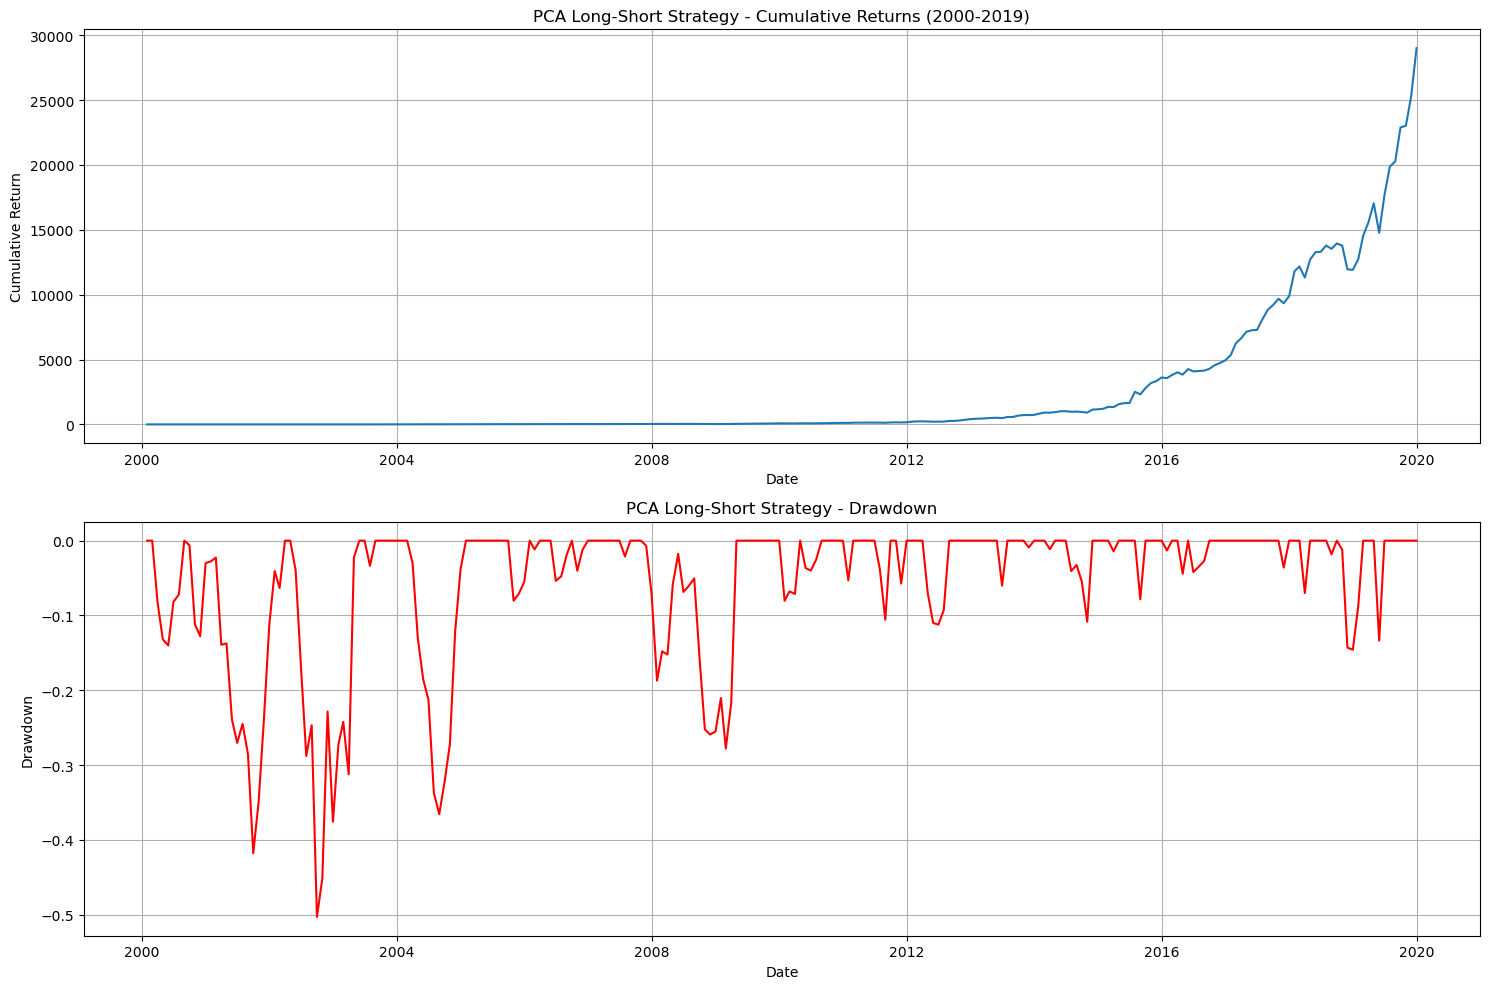

Performance Statistics:
Total Cumulative Return: 29005.9496
Maximum Drawdown: -0.5030
Average Monthly Return: 0.0495
Monthly Return Volatility: 0.1143


In [221]:

def preprocess_factors(data):
    """
    Winsorize and standardize the factors
    """
    def winsorize_series(series, limits=(0.01, 0.99)):
        lower, upper = series.quantile(limits)
        return series.clip(lower, upper)

    # Create features for PCA
    data['BM'] = 1 / data['BEME']
    data['Size'] = data['ME']
    data['Beta'] = data['b']
    data['OP'] = data['OP']
    data['IVOL'] = data['ivol']

    # Winsorize
    factor_cols = ['BM', 'Size', 'Beta', 'OP', 'IVOL']
    data[factor_cols] = data[factor_cols].apply(winsorize_series)

    # Standardize
    scaler = StandardScaler()
    data[factor_cols] = scaler.fit_transform(data[factor_cols])

    return data

def orthogonalize_factors(data):
    """
    Orthogonalize factors by regressing out the market factor
    """
    factor_cols = ['BM', 'Size', 'Beta', 'OP', 'IVOL']
    market_factor = 'MktRF'

    for factor in factor_cols:
        X = sm.add_constant(data[market_factor])
        y = data[factor]

        model = sm.OLS(y, X).fit()
        data[factor + '_ortho'] = model.resid

    return data

def calculate_strategy(data):
    """
    Calculate long-short portfolio returns
    """
    # Filter time period (2000-2019)
    data = data[(data['mdate'].dt.year >= 2000) & (data['mdate'].dt.year <= 2019)]

    # Prepare data
    data = preprocess_factors(data)
    data = orthogonalize_factors(data)

    # Calculate factor scores
    factor_cols_ortho = ['BM_ortho', 'Size_ortho', 'Beta_ortho', 'OP_ortho', 'IVOL_ortho']
    data['factor_score'] = data[factor_cols_ortho].mean(axis=1)

    # Group by month and select stocks
    monthly_returns = []
    stock_groups = data.groupby(pd.Grouper(key='mdate', freq='M'))

    for month, month_data in stock_groups:
        if len(month_data) < 20:  # Ensure enough data
            continue
        
        # Sort by factor score
        month_data = month_data.sort_values(by='factor_score', ascending=False)
        
        # Select top and bottom 10 stocks
        long_stocks = month_data.head(10)
        short_stocks = month_data.tail(10)
        
        # Calculate portfolio return
        long_return = long_stocks['RET'].mean()
        short_return = short_stocks['RET'].mean()
        portfolio_return = long_return - short_return
        
        monthly_returns.append({
            'Date': month,
            'Return': portfolio_return
        })

    # Convert to DataFrame
    returns_df = pd.DataFrame(monthly_returns)
    returns_df.set_index('Date', inplace=True)

    return returns_df

def calculate_performance(returns_df):
    """
    Calculate cumulative returns and drawdown
    """
    # Cumulative Returns
    cumulative_returns = (1 + returns_df['Return']).cumprod()
    
    # Drawdown
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak

    # Create performance DataFrame
    performance_df = pd.DataFrame({
        'Cumulative_Return': cumulative_returns,
        'Drawdown': drawdown,
        'Monthly_Return': returns_df['Return']
    })

    return performance_df

def plot_performance(performance_df):
    """
    Plot cumulative returns and drawdown
    """
    plt.figure(figsize=(15, 10))

    # Cumulative Returns
    plt.subplot(2, 1, 1)
    plt.plot(performance_df.index, performance_df['Cumulative_Return'], label='Cumulative Return')
    plt.title('PCA Long-Short Strategy - Cumulative Returns (2000-2019)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.grid(True)

    # Drawdown
    plt.subplot(2, 1, 2)
    plt.plot(performance_df.index, performance_df['Drawdown'], color='red', label='Drawdown')
    plt.title('PCA Long-Short Strategy - Drawdown')
    plt.xlabel('Date')
    plt.ylabel('Drawdown')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Performance Statistics
    print("Performance Statistics:")
    print(f"Total Cumulative Return: {performance_df['Cumulative_Return'].iloc[-1]:.4f}")
    print(f"Maximum Drawdown: {performance_df['Drawdown'].min():.4f}")
    print(f"Average Monthly Return: {performance_df['Monthly_Return'].mean():.4f}")
    print(f"Monthly Return Volatility: {performance_df['Monthly_Return'].std():.4f}")

# Run the strategy
returns_df = calculate_strategy(data)
performance_df = calculate_performance(returns_df)
plot_performance(performance_df)

In [229]:
def calculate_ratios(returns_df, data):
    """
    Calculate Information Ratio and Sharpe Ratio
    """
    # Information Ratio using Alpha_mkt
    information_ratio = data['Alpha_mkt'].mean() / data['Alpha_mkt'].std()

    # Sharpe Ratio using portfolio returns
    sharpe_ratio = returns_df['Return'].mean() / returns_df['Return'].std()

    # Calculate excess returns
    excess_returns = returns_df['Return'] - data['MktRF']
    
    # Information Ratio alternative using excess returns
    information_ratio_alter = excess_returns.mean() / excess_returns.std()

    return information_ratio, sharpe_ratio, information_ratio_alter  # Make sure to return 3 values


returns_df = calculate_strategy(data)  # Assuming this returns a DataFrame with 'Return'
performance_df = calculate_performance(returns_df)  # Assuming this returns some performance metrics

information_ratio, sharpe_ratio, information_ratio_alter = calculate_ratios(returns_df, data)

print(f"Information Ratio: {information_ratio:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

Information Ratio: 0.1387
Sharpe Ratio: 0.4335
information_ratio_alter: nan
